### 讀取封包

In [1]:
get_ipython().magic('matplotlib inline')


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils

from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns



np.random.seed(25)

Using TensorFlow backend.


### 讀資料

In [2]:
x_train = pd.read_csv("/Users/jianweicheng/Desktop/ＮＴＵＴ/碩二上/深度學習/assignment/03_Assignment/x_train.csv")
x_train.head(10)
x_test = pd.read_csv("/Users/jianweicheng/Desktop/ＮＴＵＴ/碩二上/深度學習/assignment/03_Assignment/x_test.csv")
# x_train

In [3]:
y_train = pd.read_csv("/Users/jianweicheng/Desktop/ＮＴＵＴ/碩二上/深度學習/assignment/03_Assignment/y_train.csv")
y_test = pd.read_csv("/Users/jianweicheng/Desktop/ＮＴＵＴ/碩二上/深度學習/assignment/03_Assignment/y_test.csv")

### 資料做標準化

In [4]:
def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu)/sigma

In [5]:
x_train['x1'] = feature_normalize(x_train['x1'])
x_train['x2'] = feature_normalize(x_train['x2'])
x_test['x1'] = feature_normalize(x_test['x1'])
x_test['x2'] = feature_normalize(x_test['x2'])

### 開始維度的調整

In [6]:
XT = np.array(x_train)
XT
X_train = XT.reshape([3500, 10, 2])
XTE = np.array(x_test)
XTE
X_test = XTE.reshape([1500, 10, 2])
X_train

array([[[-0.93694717, -0.34497048],
        [ 1.04341265, -0.419277  ],
        [ 0.23346774, -0.37714586],
        ...,
        [ 0.32840634, -0.37302807],
        [ 0.33211487, -0.34509913],
        [-1.21953785, -0.09413487]],

       [[ 1.67831453,  0.53161283],
        [ 1.22661448,  0.43095604],
        [ 0.87949523,  0.38020684],
        ...,
        [ 0.84982692,  0.43689354],
        [-0.66177358,  0.60765535],
        [-1.0823219 ,  0.83886055]],

       [[ 0.32098925,  0.63154193],
        [ 1.35715505,  0.51218759],
        [ 0.30689681,  0.54371941],
        ...,
        [ 0.09773521,  0.69830074],
        [ 1.80440486,  0.51461193],
        [-0.11810176,  0.60722689]],

       ...,

       [[-1.19919804,  2.91948352],
        [-1.09037651,  2.89785874],
        [-1.61141247,  3.00777254],
        ...,
        [-0.96809648,  3.05331444],
        [-0.79198249,  2.95632655],
        [ 2.52726651,  2.02095532]],

       [[-0.5943349 , -1.59725152],
        [-1.88096687, -1.41

In [7]:
y_train.shape

(3500, 1)

In [8]:
# input_shape = (10*2)   ## 20*1 每一筆資料 10(時間) 2個變數(x1 x2) 
# X_train = X_train.reshape(X_train.shape[0], input_shape)  ## 把10*2 矩陣  變成 20 array了!!  很重要!! 如何擺法!

In [9]:
# input_shape = (10*2)   ## 20*1 每一筆資料 10(時間) 2個變數(x1 x2) 
# X_test = X_test.reshape(X_test.shape[0], input_shape)  ## 把10*2 矩陣  變成 20 array了!!  很重要!! 如何擺法!

### 對y做onehot，總共有(0,1,2,3,4)五個字

In [10]:
LABELS = ['0', '1', '2', '3', '4']

In [11]:
y_train_onehot = np_utils.to_categorical(y_train, num_classes = 5)
y_train_onehot
y_test_onehot = np_utils.to_categorical(y_test, num_classes = 5)
y_train_onehot.shape

(3500, 5)

In [23]:
print(X_train.shape)
print(X_test.shape)

(3500, 10, 2)
(1500, 10, 2)


### 開始準備CNN

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from keras.layers import SimpleRNN, Activation, Dense, RNN
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
%matplotlib inline


In [15]:
model = Sequential()
##  SimpleRNN  注意他的 input 格式!!
model.add(SimpleRNN(units=128, input_shape=(X_train.shape[1], X_train.shape[2])))
## input_shape(shape[1]→12,shape[2]→1)
## 如果錯了，就不能跑了！！！

#model.add(SimpleRNN(128, input_shape = (1, 12), activation = 'relu'))

model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 128)               16768     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                1040      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total para

In [16]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.show()

In [17]:
model.compile(loss='categorical_crossentropy',
                optimizer='adam', metrics=['accuracy'])

# Hyper-parameters
BATCH_SIZE = 200
EPOCHS = 30

# Enable validation to use ModelCheckpoint and EarlyStopping callbacks.
history = model.fit(X_train, y_train_onehot, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=0.18, verbose=1)


Train on 2870 samples, validate on 630 samples
Epoch 1/30
2870/2870 [==============================] - 1s 279us/step - loss: 1.2581 - acc: 0.4627 - val_loss: 2.6131 - val_acc: 0.0000e+00
Epoch 2/30
2870/2870 [==============================] - 0s 108us/step - loss: 0.8674 - acc: 0.6373 - val_loss: 3.0129 - val_acc: 0.0000e+00
Epoch 3/30
2870/2870 [==============================] - 0s 98us/step - loss: 0.6860 - acc: 0.7261 - val_loss: 3.0063 - val_acc: 0.0000e+00
Epoch 4/30
2870/2870 [==============================] - 0s 99us/step - loss: 0.5324 - acc: 0.7955 - val_loss: 2.7993 - val_acc: 0.0000e+00
Epoch 5/30
2870/2870 [==============================] - 0s 102us/step - loss: 0.4710 - acc: 0.8296 - val_loss: 2.5827 - val_acc: 0.0000e+00
Epoch 6/30
2870/2870 [==============================] - 0s 103us/step - loss: 0.4440 - acc: 0.8324 - val_loss: 2.2845 - val_acc: 0.0000e+00
Epoch 7/30
2870/2870 [==============================] - 0s 104us/step - loss: 0.4178 - acc: 0.8443 - val_loss: 2.20

(BATCH_SIZE = 200),(EPOCHS = 30),(validation_split=0.18)

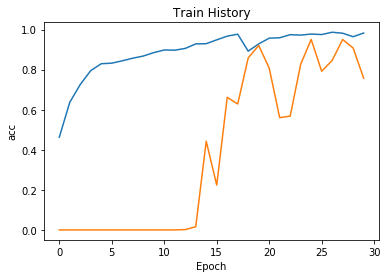

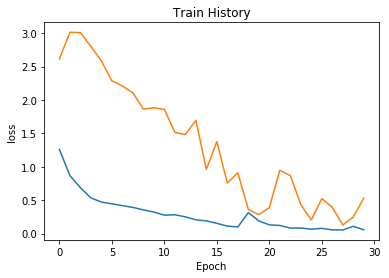

In [18]:
show_train_history(history, 'acc', 'val_acc')

show_train_history(history, 'loss', 'val_loss')



--- Learning curve of model training ---



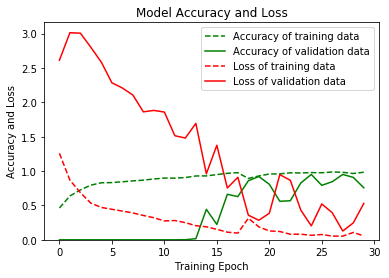

In [19]:
print("\n--- Learning curve of model training ---\n")

# summarize history for accuracy and loss
plt.figure(figsize=(6, 4))
plt.plot(history.history['acc'], "g--", label="Accuracy of training data")
plt.plot(history.history['val_acc'], "g", label="Accuracy of validation data")
plt.plot(history.history['loss'], "r--", label="Loss of training data")
plt.plot(history.history['val_loss'], "r", label="Loss of validation data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()


### 把test資料丟進來看準確度

In [20]:
score = model.evaluate(X_test, y_test_onehot, verbose=1)
print("\nAccuracy on test data: %0.2f" % score[1])
print("\nLoss on test data: %0.2f" % score[0])

1500/1500 [==============================] - 0s 102us/step

Accuracy on test data: 0.94

Loss on test data: 0.13


### 從混沌矩陣來看結果

In [21]:
def show_confusion_matrix(validations, predictions):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, cmap="coolwarm",linecolor='white', linewidths=1, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()



--- Confusion matrix for test data ---



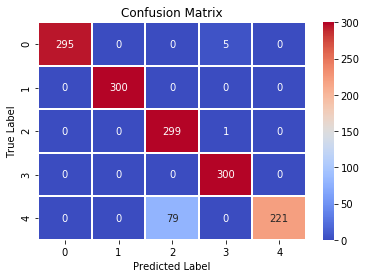


--- Classification report for test data ---

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       300
           1       1.00      1.00      1.00       300
           2       0.79      1.00      0.88       300
           3       0.98      1.00      0.99       300
           4       1.00      0.74      0.85       300

    accuracy                           0.94      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.95      0.94      0.94      1500



In [22]:
print("\n--- Confusion matrix for test data ---\n")

y_pred_test = model.predict(X_test)
# Take the class with the highest probability from the test predictions
max_y_pred_test = np.argmax(y_pred_test, axis=1)
max_y_test = np.argmax(y_test_onehot, axis=1)

show_confusion_matrix(max_y_test, max_y_pred_test)

# %%

print("\n--- Classification report for test data ---\n")

print(classification_report(max_y_test, max_y_pred_test))
